In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

## Load data

In [2]:
sites = glob.glob('*.tsv')
site_names = [site.split('_')[0] for site in sites]

site_names

['24',
 'hvg',
 'index',
 'm4sport',
 'metropol',
 'nepszava',
 'origo',
 'portfolio',
 'telex']

In [3]:
dfs = {}

for site, name in zip(sites, site_names):
    df = pd.read_csv(site, sep='\t')
    df['date_of_creation'] = pd.to_datetime(df['date_of_creation'])
    df['year'] = df['date_of_creation'].dt.year
    dfs[name] = df

In [4]:
all_df = pd.concat(dfs.values())
all_df.head()

,uuid,title,domain,url,date_of_creation,tags,article_sent_count,lead_sent_count,article_token_count,lead_token_count,article_char_count,lead_char_count,article_paragraph_count,year
0,edb1626e-11bd-4062-ac0f-31b2a4a45e25,Nemsokára repülsz? Mutatunk 5+1 életmentő tippet,24.hu,http://24.hu/elet-stilus/2017/05/02/nemsokara-...,2017-05-02 10:10:00,['Élet-Stílus'],19,2,370,36,2312,188,12,2017.0
1,d2dd07cc-5b54-405e-be1f-db29dcb72736,Néhány óra különbséggel halt meg apa és fia,24.hu,http://24.hu/elet-stilus/2017/07/17/nehany-ora...,2017-07-17 11:46:00,['Élet-Stílus'],10,1,116,10,738,58,7,2017.0
2,875f599e-5910-433a-a8d8-e69d469a354f,Nem is hipermarket az új hiper.hu,24.hu,http://24.hu/fn/gazdasag/2012/06/13/nem-is-hip...,2012-06-13 17:38:00,['Gazdaság'],42,1,1072,16,7315,87,18,2012.0
3,ce286b27-0677-474d-9965-b6c0a5f10f10,"Retteghet a Google, törvényben adóztatja meg O...",24.hu,http://24.hu/fn/gazdasag/2015/10/30/retteghet-...,2015-10-30 17:05:00,['Gazdaság'],25,2,492,32,3400,208,10,2015.0
4,4d83fa01-de9e-40f1-8e9b-f83a57f891ed,Európa jövője a szél,24.hu,http://24.hu/fn/gazdasag/2016/03/16/europa-jov...,2016-03-16 20:20:00,['Gazdaság'],12,1,259,11,2099,91,10,2016.0


## Article count

<AxesSubplot:xlabel='domain'>

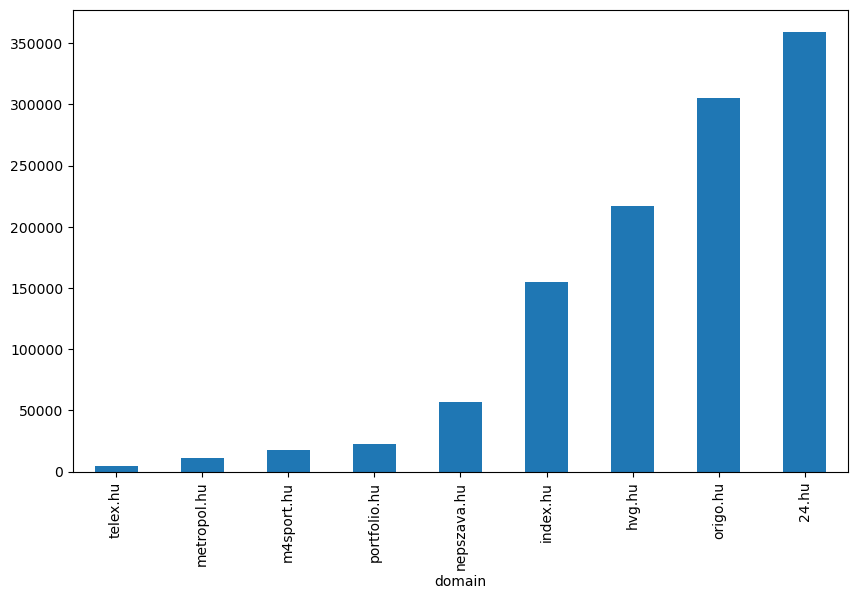

In [5]:
article_count = all_df.groupby('domain')['domain'].count().sort_values(ascending=True)
article_count.plot.bar(x='domain', figsize=(10, 6))

In [6]:
f"Number of rows: {len(all_df)}"

'Number of rows: 1148246'

## Lead length

In [7]:
def plot_length(length_of):
    graph = all_df.groupby('domain')[length_of].agg(['mean', 'std']).sort_values(by = ['mean'])
    print(graph['mean'].plot.bar(yerr=graph['std'], figsize=(10, 6)))

In [8]:
lead_length = {
    'sent' : 'lead_sent_count',
    'token' : 'lead_token_count',
    'char' : 'lead_char_count',} 

AxesSubplot(0.125,0.11;0.775x0.77)


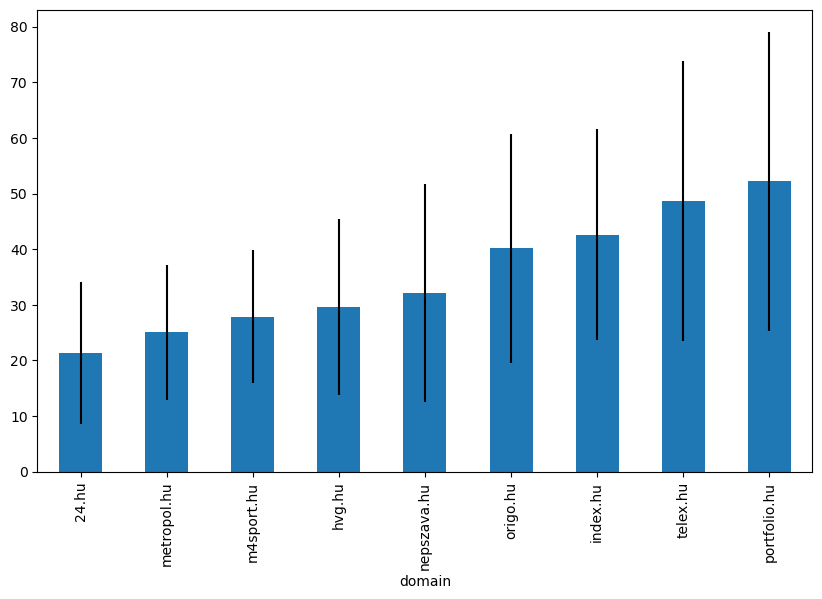

In [12]:
plot_length(lead_length['token'])

## Article length

In [10]:
article_length = {
    'sent' :'article_sent_count',
    'token' : 'article_token_count',
    'char' : 'article_char_count',}

AxesSubplot(0.125,0.11;0.775x0.77)


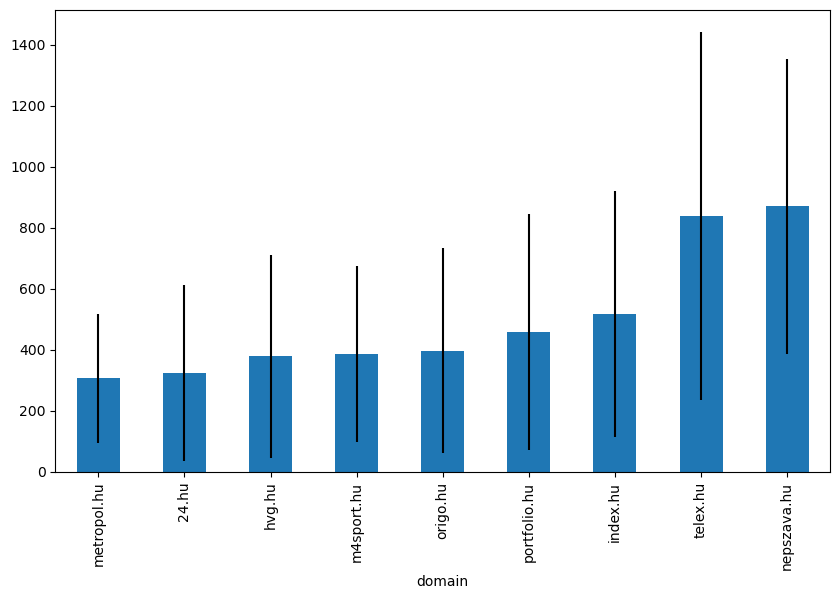

In [13]:
plot_length(article_length['token'])

## Articles by year

<AxesSubplot:xlabel='year'>

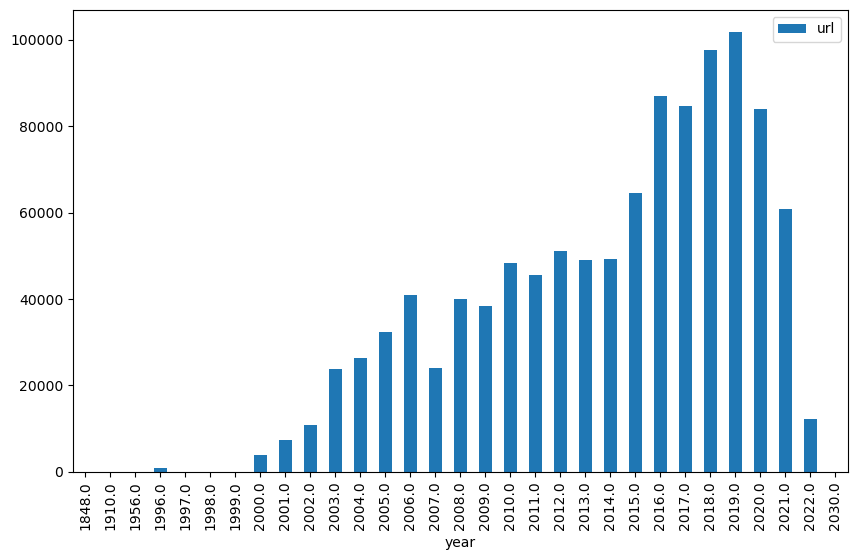

In [14]:
g = all_df.groupby('year').count().reset_index()
g.plot.bar(x='year', y = 'url', figsize=(10, 6))

## n-grams

In [6]:
from collections import defaultdict
from nltk.corpus import stopwords
import string
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nyist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
punctuation = [',', ':', '!', '?', ';', '-', '_', '–', '—']
def generate_N_grams(text: str, ngram=1):
    words = [word for word in text.split(" ") if (word.lower() not in set(stopwords.words('hungarian')) and word.lower() not in punctuation)]
    temp = zip(*[words[i:] for i in range(0, ngram)])
    ans = [' '.join(ngram) for ngram in temp]
    return ans

In [14]:
unigram_values = defaultdict(int)
for text in all_df.title:
    for word in generate_N_grams(str(text)):
        unigram_values[word] += 1

In [9]:
bigram_values = defaultdict(int)
for text in all_df.title:
    for word in generate_N_grams(str(text), 2):
        bigram_values[word] += 1

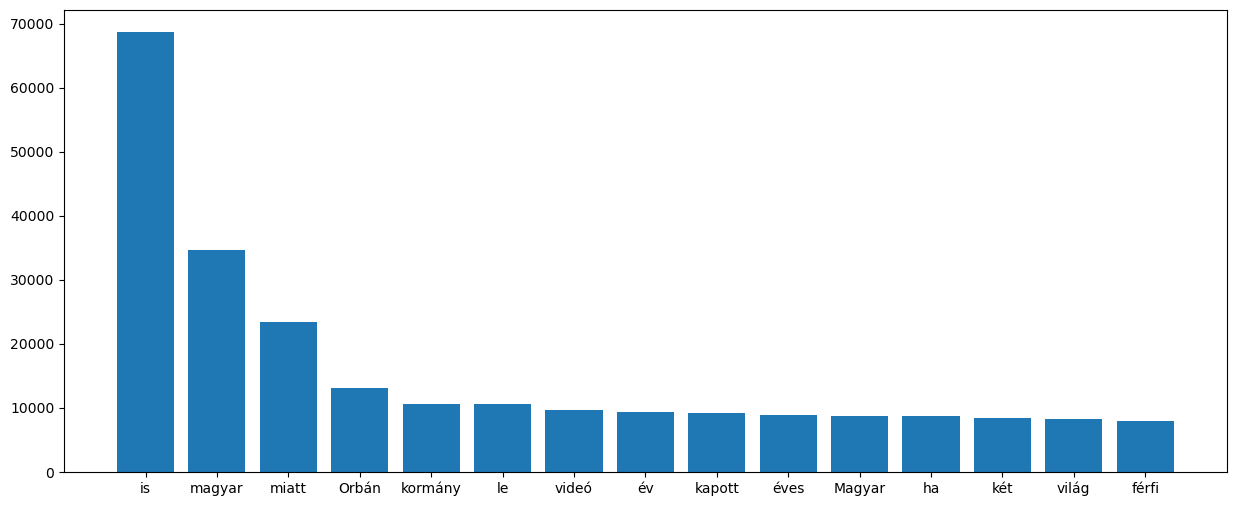

In [15]:
unigrams = pd.DataFrame(sorted(unigram_values.items(), key=lambda x:x[1], reverse=True))

plt.figure(1, figsize=(15, 6))
plt.bar(unigrams[0][:15], unigrams[1][:15])

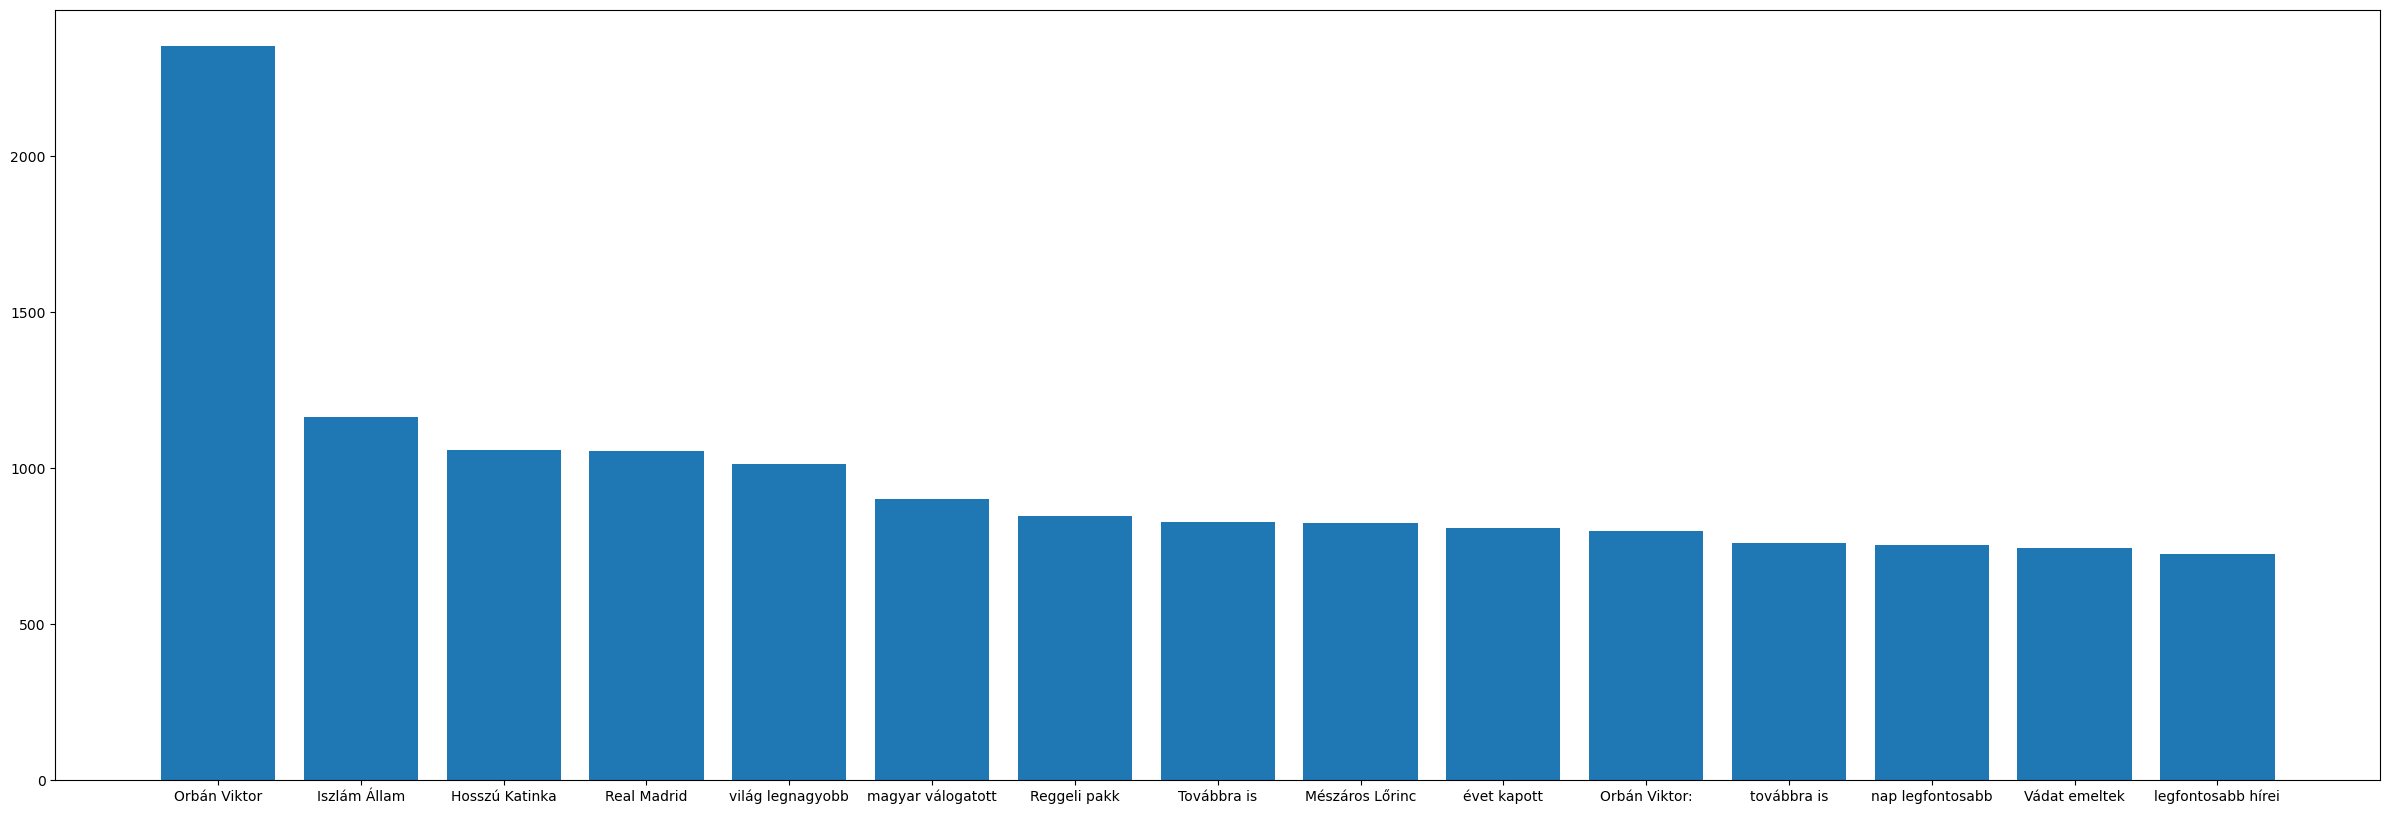

In [13]:
bigrams = pd.DataFrame(sorted(bigram_values.items(), key=lambda x:x[1], reverse=True))

plt.figure(1, figsize=(30, 10))
plt.bar(bigrams[0][:15], bigrams[1][:15])